# **Pre-Requisites**

In [1]:
%%capture
!pip install emoji

In [2]:
import regex as re
import pandas as pd
import numpy as np
import emoji
import nltk
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

# **Pre-Processing Dataset**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/NLP Chat Analysis/Dataset/Dataset 0.csv',index_col=0)

In [4]:
df.sample()

,Date,Time,Message,Messenger
103,2022-03-29,12:34 pm,In fact there won't be class on Thursday and ...,Pooja Jain


In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 42 to 107
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       55 non-null     object
 1   Time       55 non-null     object
 2   Message    55 non-null     object
 3   Messenger  55 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [7]:
#df.Messenger.unique()

In [8]:
total_messages = df.shape[0]
print(total_messages)

55


In [9]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

0


In [10]:
df.tail()

,Date,Time,Message,Messenger
103,2022-03-29,12:34 pm,In fact there won't be class on Thursday and ...,Pooja Jain
104,2022-03-29,12:40 pm,Ok ma'am,+91 70136 41413
105,2022-03-30,2:37 pm,No class tomorrow and day after,Pooja Jain
106,2022-08-04,1:05 pm,I have uploaded all the lectures and slides i...,Pooja Jain
107,2022-09-04,9:31 am,https //nlp.stanford.edu/IR-book/html/htmledi...,Pooja Jain


In [11]:
def split_count(text):

    emoji_list = []
    data = re.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI["en"] for char in word):
            emoji_list.append(word)

    return emoji_list

df["Emojis"] = df["Message"].apply(split_count)

In [12]:
emojis = sum(df['Emojis'].str.len())
print(emojis)

3


In [13]:
URLPATTERN = r'(https?+)|(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
df['Links'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [14]:
links = np.sum(df.Links)

In [15]:
print("Groupchat Statistics")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Groupchat Statistics
Messages: 55
Media: 0
Emojis: 3
Links: 6


In [16]:
media_messages_df = df[df['Message'] == '<Media omitted>']

In [17]:
messages_df = df.drop(media_messages_df.index)

In [18]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 42 to 107
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       55 non-null     object
 1   Time       55 non-null     object
 2   Message    55 non-null     object
 3   Messenger  55 non-null     object
 4   Emojis     55 non-null     object
 5   Links      55 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 5.1+ KB


In [19]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))

In [20]:
messages_df.sample(5)

,Date,Time,Message,Messenger,Emojis,Links,Letter_Count,Word_Count
61,2022-01-24,10:00 pm,Tomorrow's class is postponed as I am not well,Pooja Jain,[],0,47,10
63,2022-01-27,9:31 am,"Sorry, I was not feeling well so couldn't inf...",Pooja Jain,[],0,50,10
95,2022-03-28,7:19 pm,Sorry for late from college,Pooja Jain,[],0,28,6
103,2022-03-29,12:34 pm,In fact there won't be class on Thursday and ...,Pooja Jain,[],0,55,11
102,2022-03-29,12:34 pm,I told in the class na that I don't have marker,Pooja Jain,[],0,48,12


In [21]:
total_emojis_list = list(set([a for b in messages_df.Emojis for a in b]))
total_emojis = len(total_emojis_list)
print("Total No. Distinct Emojis are",total_emojis)

Total No. Distinct Emojis are 3


# **Data Visualisation**

In [22]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

In [23]:
total_emojis_list = list([a for b in messages_df.Emojis for a in b])
# print(total_emojis_list)
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
# for i in emoji_dict:
#   print(i)

In [24]:
emoji_df = pd.DataFrame(emoji_dict, columns=['Emoji', 'Count'])
# emoji_df

In [25]:
n=5
emoji_stats = px.pie(emoji_df.head(n), title='Emoji Distribution',template = "plotly_dark", values='Count', names='Emoji', hole=0.3)
emoji_stats.update_traces(textposition='outside',
                          textinfo='percent+label',
                          marker=dict(colors=colors,
                          line=dict(color='#ffffff', width=2)),
                          textfont_size=20
)
emoji_stats.update_layout(legend = dict(
        bgcolor="#f5427e",
        bordercolor="White",
        borderwidth=2,
        font=dict(size= 20)
        )            
)
emoji_stats.show()

In [26]:
total_messages_list = messages_df.Messenger
messenger_dict = dict(Counter(total_messages_list))
messenger_dict = sorted(messenger_dict.items(), key=lambda x: x[1], reverse=False)
# messenger_dict

In [27]:
messenger_df = pd.DataFrame(messenger_dict, columns=['Messenger', 'No. of Messages'])
messenger_df = messenger_df.sort_values('No. of Messages', ascending=False)
# messenger_df

In [28]:
n=10
messenger_stats = px.pie(messenger_df.head(n), title='Message Distribution',values='No. of Messages', names='Messenger', template = "plotly_dark", hole=0.3)
messenger_stats.update_traces(textposition='outside', 
                              textinfo='percent+label',
                              marker=dict(colors=colors, 
                              line=dict(color='#ffffff', width=2)
                          )
)
messenger_stats.update_layout(legend = dict(
        bgcolor="#f5427e",
        bordercolor="White",
        borderwidth=2,
         font=dict(size= 12)
         )
)  
messenger_stats.show()

# **WordClouds**

There are Total 2344 words in all the messages.



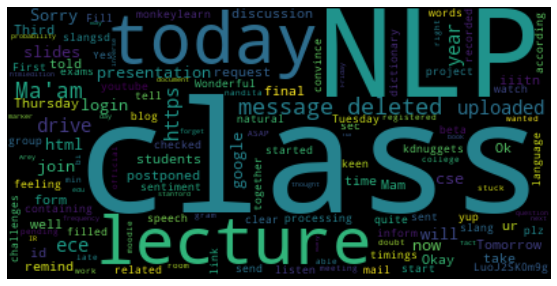

In [29]:
text = " ".join(review for review in messages_df.Message)
print ("There are Total {} words in all the messages.\n".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# n=5
# l=list(messages_df.Messenger.unique())

# for i in range(n):
#   try:
#     dummy_df = messages_df[messages_df['Messenger'] == l[i]]
#     text = " ".join(review for review in dummy_df.Message)
#     stopwords = set(STOPWORDS)
#     #Generate a word cloud image
#     print(l[i],'\n')
#     wordcloud = WordCloud( background_color="black").generate(text)
#     #Display the generated image   
#     plt.figure( figsize=(10,5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off")
#     plt.show()
#     print('\n')
#   except ValueError:
#     n+=1
#     continue

# Sentiment Analysis

In [31]:
!pip install autocorrect

In [32]:
from autocorrect import Speller
spell = Speller(fast=True)

## **Vader Sentiment Analyzer**

In [33]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [35]:
df.sample()

,Date,Time,Message,Messenger,Emojis,Links
93,2022-03-28,4:44 pm,"If u have any doubt, join the discussion meet...",Pooja Jain,[],0


In [36]:
df['vader_score'] = [sid.polarity_scores(spell(x))['compound'] for x in df['Message'] ]

In [37]:
df.sample(5)

,Date,Time,Message,Messenger,Emojis,Links,vader_score
104,2022-03-29,12:40 pm,Ok ma'am,+91 70136 41413,[],0,0.2960
62,2022-01-27,9:14 am,Ma'am is there class today?,+91 94797 54811,[],0,0.0000
67,2022-06-02,4:42 pm,I have uploaded the NLP lectures,Pooja Jain,[],0,0.0000
68,2022-11-02,1:42 pm,"As told in the lecture today , the project pr...",Pooja Jain,[],0,0.0000
64,2022-01-27,10:54 am,Okay ma'am,+91 94797 54811,[],0,0.2263


In [71]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [39]:
df['Vader'] = df['vader_score'].apply(getAnalysis)

In [40]:
df.sample(5)

,Date,Time,Message,Messenger,Emojis,Links,vader_score,Vader
62,2022-01-27,9:14 am,Ma'am is there class today?,+91 94797 54811,[],0,0.000,Neutral
56,2022-01-20,9:59 am,https //www.youtube.com/watch?v=LuoJ2SK0m9g,Pooja Jain,[],2,0.000,Neutral
69,2022-11-02,1:43 pm,Third year cse and then third year ece,Pooja Jain,[],0,0.000,Neutral
96,2022-03-28,7:19 pm,Join in 5 min,Pooja Jain,[],0,0.296,Positive
87,2022-03-03,9:23 pm,This message was deleted,+91 70136 41413,[],0,0.000,Neutral


In [41]:
vader_dict=dict(Counter(df.Vader))
vader_dict = sorted(vader_dict.items(), key=lambda x: x[1], reverse=True)

In [42]:
vader_dict

[('Neutral', 38), ('Positive', 9), ('Negative', 8)]

In [43]:
vader_df = pd.DataFrame(vader_dict, columns=['Sentiment', 'Count'])

In [44]:
vader_stats = px.pie(vader_df, values='Count', names='Sentiment', title='Vader Sentiments Distribution', template = "plotly_dark", hole=0.3)
vader_stats.update_traces(textposition='outside', 
                          textinfo='percent+label',
                          marker=dict(colors=colors, 
                          line=dict(color='#ffffff', width=2)),
                          textfont_size=20
)
vader_stats.update_layout(legend = dict(
        bgcolor="#f5427e",
        bordercolor="White",
        borderwidth=2,
         font=dict(size= 15)
         )
)
vader_stats.show()

## **Textblob Analyzer**

In [45]:
!pip install textblob

In [46]:
from textblob import TextBlob

In [47]:
# def getSubjectivity(text):
#    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [48]:
# df['TextBlob_Subjectivity'] =    df['Message'].apply(getSubjectivity)
df['TextBlob_Polarity'] =    df['Message'].apply(getPolarity)

In [49]:
df['TextBlob'] = df['TextBlob_Polarity'].apply(getAnalysis)

In [50]:
df.sample(5)

,Date,Time,Message,Messenger,Emojis,Links,vader_score,Vader,TextBlob_Polarity,TextBlob
43,2022-11-01,11:05 am,yup,Pooja Jain,[],0,0.0,Neutral,0.0,Neutral
103,2022-03-29,12:34 pm,In fact there won't be class on Thursday and ...,Pooja Jain,[],0,0.0,Neutral,0.0,Neutral
94,2022-03-28,7:04 pm,This message was deleted,Gowtham,[],0,0.0,Neutral,0.0,Neutral
100,2022-03-29,12:12 pm,Arey how many times will you remind🤔🧐😵‍💫,Pooja Jain,"[🤔, 🧐, 😵‍💫]",0,0.0,Neutral,0.5,Positive
53,2022-12-01,3:56 pm,login with ur iiitn id,Pooja Jain,[],0,0.0,Neutral,0.0,Neutral


In [51]:
textblob_dict=dict(Counter(df.TextBlob))
textblob_dict = sorted(textblob_dict.items(), key=lambda x: x[1], reverse=True)

In [52]:
textblob_df = pd.DataFrame(textblob_dict, columns=['Sentiment', 'Count'])

In [53]:
textblob_stats = px.pie(textblob_df, values='Count', names='Sentiment', title='TextBlob Sentiments Distribution', template = "plotly_dark", hole=0.3)
textblob_stats.update_traces(textposition='outside', 
                          textinfo='percent+label',
                          marker=dict(colors=colors, 
                          line=dict(color='#ffffff', width=2)),
                          textfont_size=20
)
textblob_stats.update_layout(legend = dict(
        bgcolor="#f5427e",
        bordercolor="White",
        borderwidth=2,
         font=dict(size= 15)
         )
)
textblob_stats.show()

## **Deep Learning Approach**

In [54]:
%%capture
!pip install import_ipynb

In [55]:
%%capture
import import_ipynb
%cd "/content/drive/MyDrive/Colab Notebooks"

In [56]:
%%capture
from SentimentAnalysisDL import predict_sentiment
df['Deep Learning'] = df['Message'].apply(predict_sentiment)

In [65]:
df.sample()

,Date,Time,Message,Messenger,Emojis,Links,vader_score,Vader,TextBlob_Polarity,TextBlob,Deep Learning
64,2022-01-27,10:54 am,Okay ma'am,+91 94797 54811,[],0,0.2263,Positive,0.5,Positive,positive


In [58]:
DL_dict=dict(Counter(df['Deep Learning']))
DL_dict = sorted(DL_dict.items(), key=lambda x: x[1], reverse=True)

In [59]:
DL_df = pd.DataFrame(DL_dict, columns=['Sentiment', 'Count'])

In [60]:
DL_stats = px.pie(DL_df, values='Count', names='Sentiment', title='Deep Learning Sentiments Distribution', template = "plotly_dark", hole=0.3)
DL_stats.update_traces(textposition='outside', 
                          textinfo='percent+label',
                          marker=dict(colors=colors, 
                          line=dict(color='#ffffff', width=2)),
                          textfont_size=20
)
DL_stats.update_layout(legend = dict(
        bgcolor="#f5427e",
        bordercolor="White",
        borderwidth=2,
         font=dict(size= 15)
         )
)
DL_stats.show()

# **Test**

In [75]:
text="We are very Happy"
print("Vader Predicts",getPolarity(text))
print("Deep learning Predicts",predict_sentiment(text).upper())

Vader Predicts 1.0
Deep learning Predicts POSITIVE
